# Neural Networks

Prashant Madaan

# I. Overview

In this notebook we are learning and applying neural netowrks. The neural network model has been inspired from the structure of human brain where in each neuron repredsents a computational unit. A single perceptron represent an actualy neuron in the neural networks.

Neural Netoworks can be used for a vaierty of use cases be it regression or classification. Neural networks are also used in deep learning for applications such as Image Recognition, Voice Recognition etc. We will be solving a simple regression problems with neural networks in this assignment. 

# II. Data

## Introduction of Data for Regression
The ML problem aims to predict housing prices for the Melbourne area. The dataset contains 58189 rows and 13 columns. The list of columns and description is as below: 

<table style="width:100%">
  <tr>
    <th>Price</th>
    <th>Price in Australian dollars</th>
  </tr>
  
  <tr>
    <td>Method</td>
    <td> S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.</td> 
  </tr>
  <tr>
    <td>Type</td>
    <td>br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.</td> 
  </tr>
  <tr>
    <td>SellerG</td>
    <td>Real Estate Agent</td> 
  </tr>
  <tr>
    <td>Date</td>
    <td>Date sold</td> 
  </tr>
  <tr>
    <td>Distance</td>
    <td>Distance from CBD in Kilometres</td> 
  </tr>
  <tr>
    <td>Regionname</td>
    <td>General Region (West, North West, North, North east ...etc)</td> 
  </tr>
  <tr>
    <td>Propertycount</td>
    <td>Number of properties that exist in the suburb</td> 
  </tr>
  <tr>
    <td>Rooms</td>
    <td>Number of Bedrooms</td> 
  </tr>
  <tr>
    <td>CouncilArea</td>
    <td>Governing council for the area</td> 
  </tr>
  <tr>
    <td>Suburb</td>
    <td>Suburb</td> 
  </tr>
  <tr>
    <td>Address</td>
    <td>Address of the house</td> 
  </tr>
  <tr>
    <td>Postcode</td>
    <td>zip code of the house</td> 
  </tr>
</table>

Since now we have some intuition about our data set, we will move forward and start with reading the data.


### Source of Data
The data has been picked from a data set from Kaggle. The original source of data is publicly available results posted every week from Domain.com.au.
              
Kaggle Link -->https://www.kaggle.com/anthonypino/melbourne-housing-market/home


### Reading the Data
Initial Observations after downloading the data:
1. The data file has .csv extension. 
2. The rows in the file have column separated data. 
3. Headers are present in the file.
 
Read the data using read_csv function in the pandas library

In [59]:
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst
complete_dataset=pd.read_csv('MELBOURNE_HOUSE_PRICES.csv')

### Pre-Processing the data

As part of the pre-processing, the following steps were performed:
1. The data were divided into training and test sets.
2. The data was scanned for any null values.
3. The rows with the price as null values were removed.

In [60]:
 def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

In [61]:
data_partitions=partition_data(complete_dataset)
train_dataset=data_partitions[0]
print("Shape of training set",train_dataset.shape)
test_dataset=data_partitions[1]
print("Shape of test set",test_dataset.shape)

Shape of training set (46551, 13)
Shape of test set (11638, 13)


In [62]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551 entries, 0 to 46550
Data columns (total 13 columns):
Suburb           46551 non-null object
Address          46551 non-null object
Rooms            46551 non-null int64
Type             46551 non-null object
Method           46551 non-null object
SellerG          46551 non-null object
Date             46551 non-null object
Postcode         46551 non-null int64
Regionname       46551 non-null object
Propertycount    46551 non-null int64
Distance         46551 non-null float64
CouncilArea      46551 non-null object
Price            36001 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.6+ MB


<b>List of all the columns and their data types.

In [63]:
train_dataset.describe()

,Rooms,Postcode,Propertycount,Distance,Price
count,46551.000000,46551.000000,46551.000000,46551.000000,3.600100e+04
mean,3.107237,3125.175829,7632.984533,12.686509,9.951914e+05
std,0.951167,124.951757,4444.615468,7.612363,5.900015e+05
min,1.000000,3000.000000,39.000000,0.000000,8.500000e+04
25%,3.000000,3055.000000,4380.000000,6.800000,6.195000e+05
50%,3.000000,3107.000000,6795.000000,11.400000,8.300000e+05
75%,4.000000,3163.000000,10412.000000,16.700000,1.215000e+06
max,12.000000,3978.000000,21650.000000,64.100000,8.000000e+06


<b>Some basic info about the data set indicating the mean, range and median of the various features

In [64]:
train_dataset.head(10)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price
0,Abbotsford,49 Lithgow St,3,h,S,Jellis,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1490000.0
1,Abbotsford,59A Turner St,3,h,S,Marshall,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1220000.0
2,Abbotsford,119B Yarra St,3,h,S,Nelson,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1420000.0
3,Aberfeldie,68 Vida St,3,h,S,Barry,1/4/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley,1515000.0
4,Airport West,92 Clydesdale Rd,2,h,S,Nelson,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,670000.0
5,Airport West,4/32 Earl St,2,t,S,Jellis,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,530000.0
6,Airport West,3/74 Hawker St,2,u,S,Barry,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,540000.0
7,Airport West,1/26 Highridge Cr,3,h,SP,Nelson,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,715000.0
8,Albanvale,1 Jackson Cct,6,h,PI,hockingstuart,1/4/2017,3021,Western Metropolitan,1899,14.0,Brimbank,NaN
9,Albert Park,18 Mills St,3,h,S,Cayzer,1/4/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip,1925000.0


In [65]:
train_dataset.tail(10)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price
46541,Richmond,10 Botherambo St,2,t,SP,Jellis,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1200000.0
46542,Richmond,288 Church St,3,h,S,Abercromby's,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1555000.0
46543,Richmond,25 Dickmann St,3,h,S,Marshall,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1361000.0
46544,Richmond,12 Longfield St,3,h,S,hockingstuart,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1540000.0
46545,Richmond,1/7 Sanders Pl,3,t,S,Jellis,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1582000.0
46546,Richmond,12 Tanner St,3,h,PI,Greg,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1505000.0
46547,Ringwood,26 Andrew St,3,h,S,Fletchers,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,NaN
46548,Ringwood,1 Ashcombe Dr,3,h,S,hockingstuart,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,768000.0
46549,Ringwood,4 Caroline St,4,h,S,Barry,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,1300000.0
46550,Ringwood,1 Hillcrest Av,4,h,SN,Fletchers,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,NaN


<b>Sample data from the file

In [66]:
 train_dataset.isnull().sum().sort_values(ascending=False)

Price            10550
CouncilArea          0
Distance             0
Propertycount        0
Regionname           0
Postcode             0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

<b>Checking the data for null values

In [67]:
# To remove all the Null column: Price

train_dataset_cleaned=train_dataset.dropna(subset=['Price']) 
train_dataset_cleaned.shape

(36001, 13)

<b>Removing the Null values

C:\Users\prash\Anaconda_Setup\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


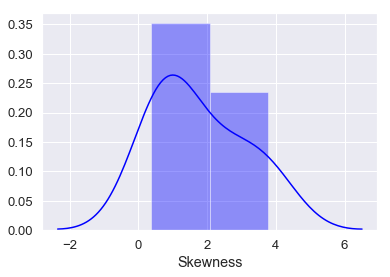

<Figure size 864x576 with 0 Axes>

In [68]:
train_dataset_skew=train_dataset_cleaned.skew()
sns.distplot(train_dataset_skew,color='blue',axlabel ='Skewness')
plt.figure(figsize = (12,8))
plt.show()

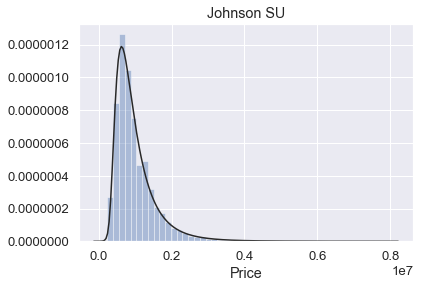

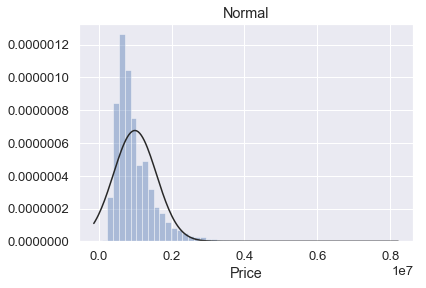

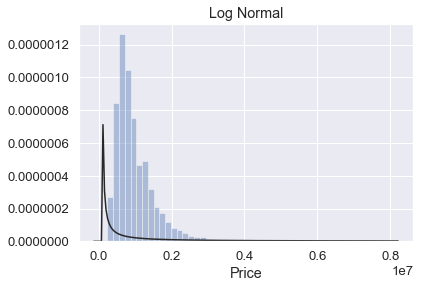

In [69]:
#Plotting transformations to identify which should be used
y = train_dataset_cleaned['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=scipyst.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=scipyst.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=scipyst.lognorm)

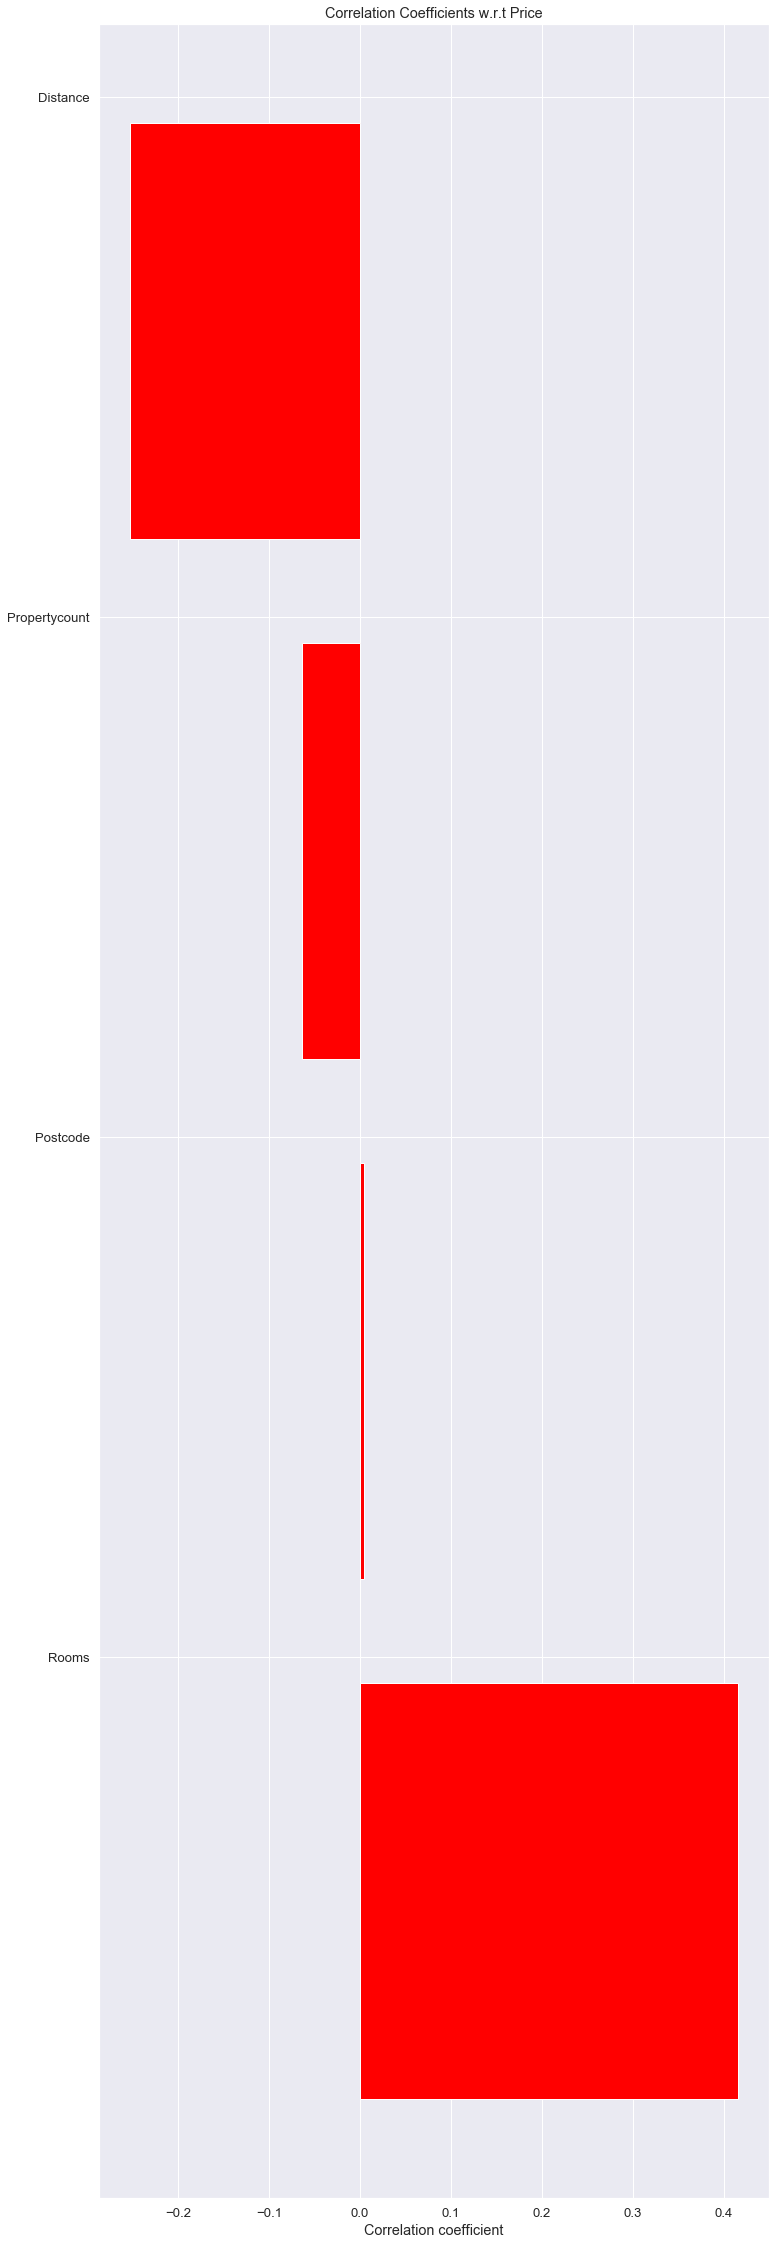

In [70]:
num_feat=train_dataset_cleaned.columns[train_dataset_cleaned.dtypes!=object]
num_feat=num_feat[0:-1]

labels = []
values = []


for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_dataset_cleaned[col].values, train_dataset_cleaned.Price.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Price");

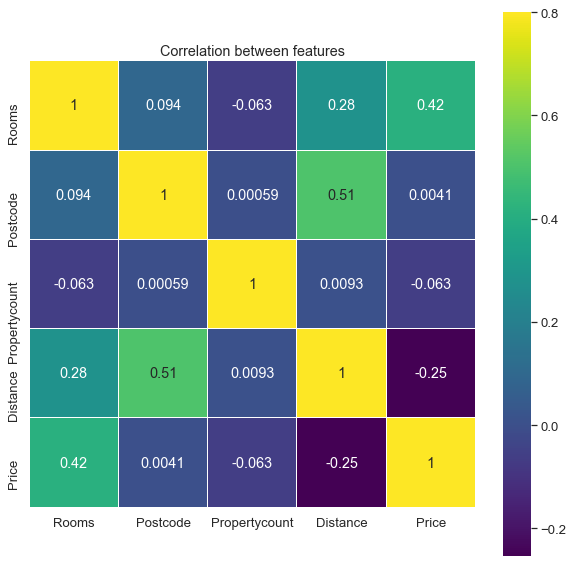

In [71]:
correlation_matrix=train_dataset_cleaned[['Rooms', 'Postcode', 'Propertycount', 'Distance', 'Price']].corr()
sns.set(font_scale=1.20)
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

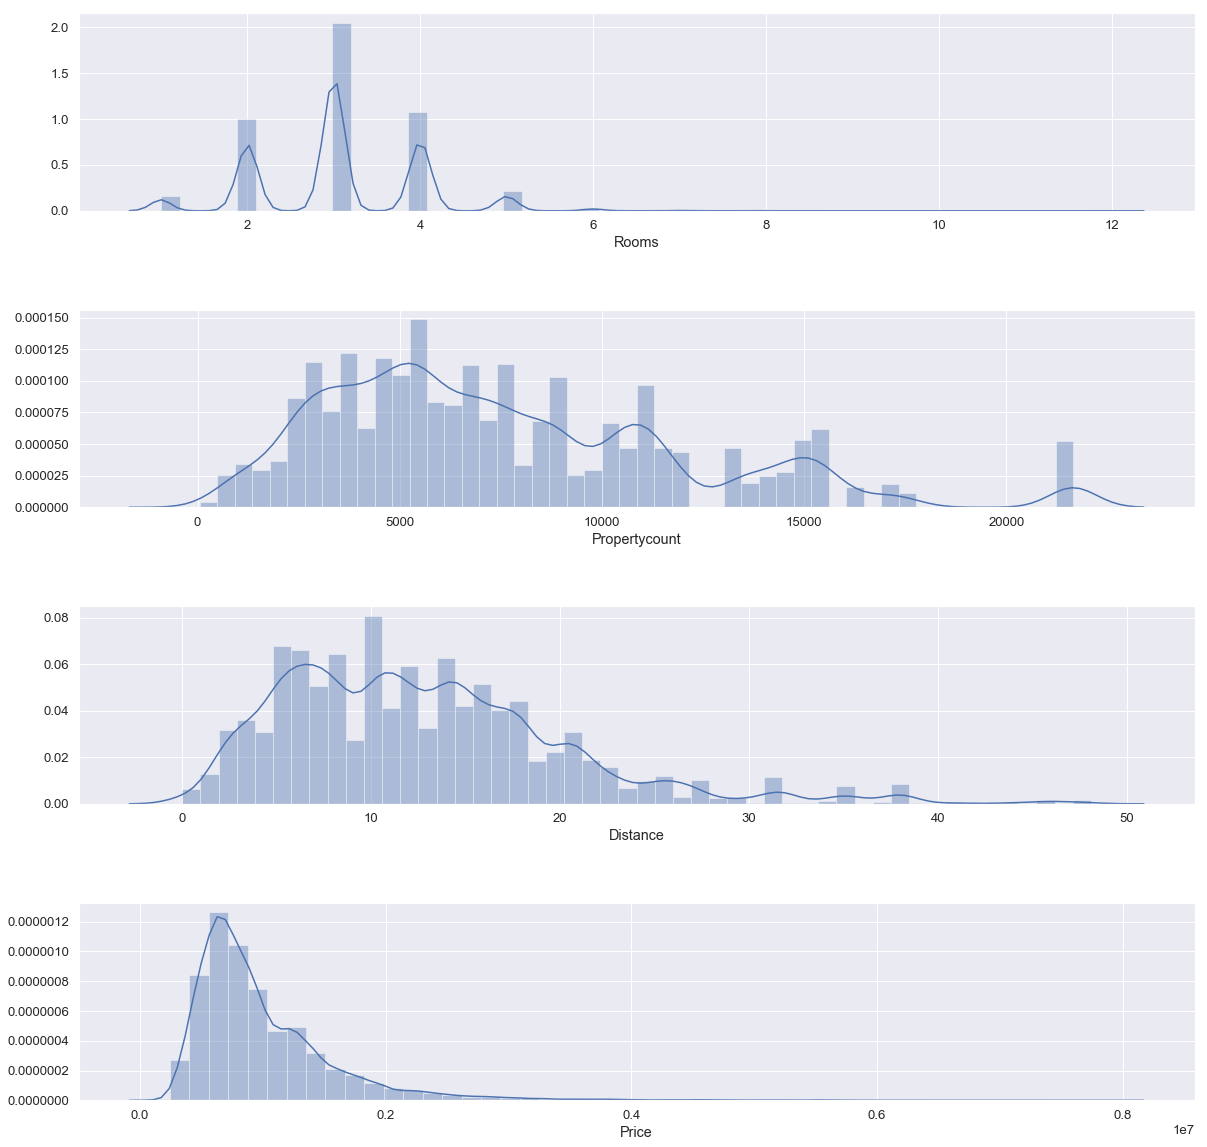

In [72]:
#Plotting Distribution Curves for the feature variables
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['Rooms', 'Propertycount', 'Distance', 'Price']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 5):
    ax = fig.add_subplot(4,1, i)
    ax = sns.distplot(train_dataset_cleaned[distribution_plot_list[(i-1)]])

In [73]:
list_of_regions=train_dataset_cleaned['Regionname'].unique()
list_of_regions

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

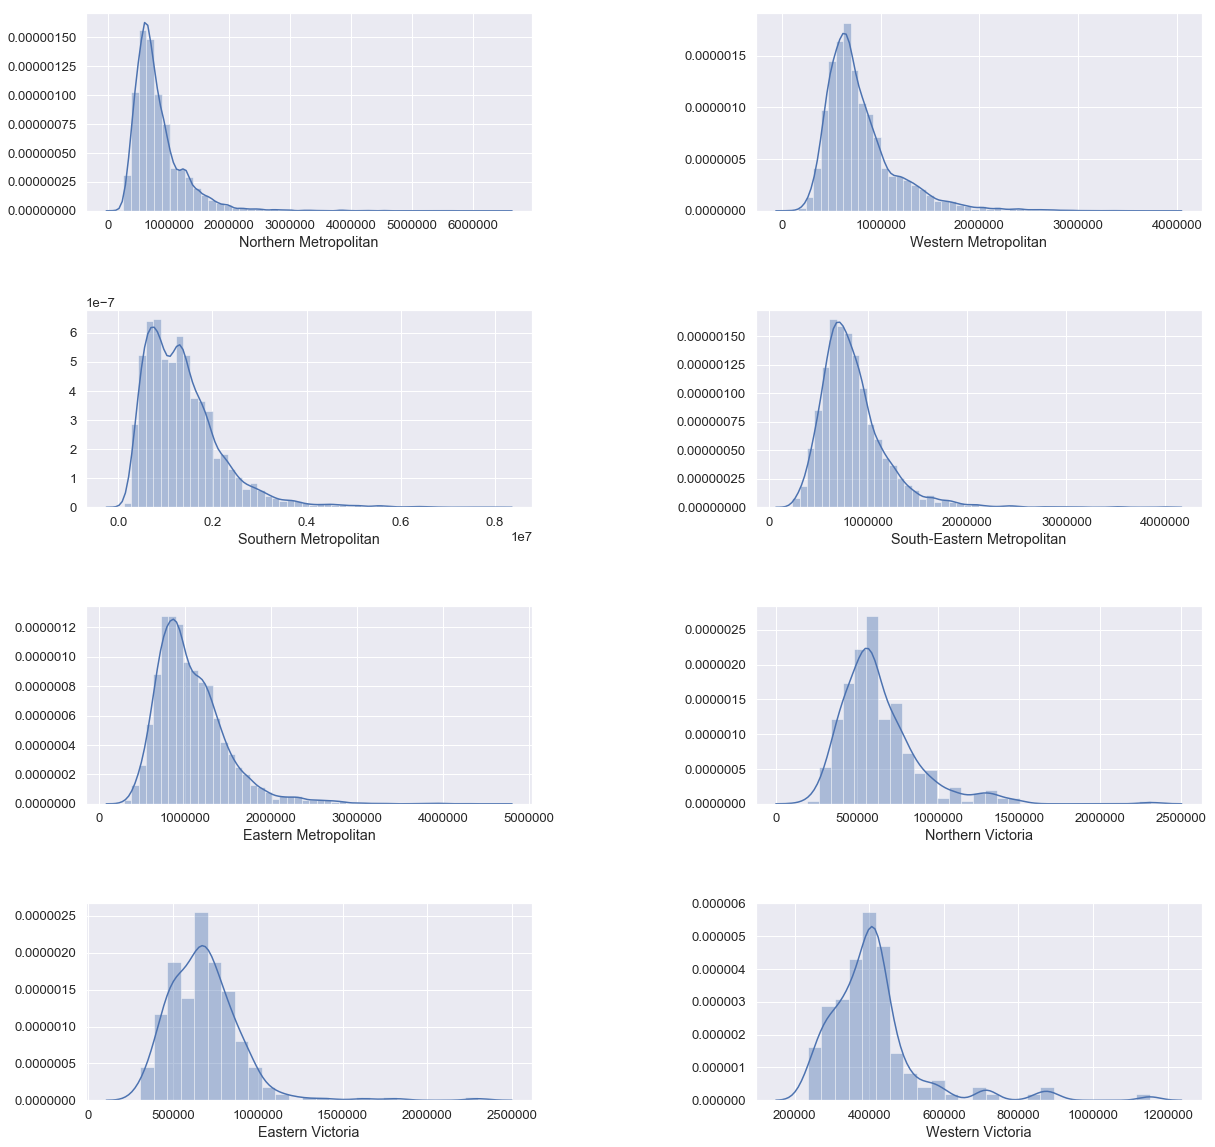

In [74]:
#Plotting Distribution Curves for the feature variables
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['Rooms', 'Propertycount', 'Distance', 'Price']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(4,2, i)
    ax = sns.distplot(train_dataset_cleaned['Price'].loc[train_dataset_cleaned['Regionname'] == list_of_regions[i-1]].values,axlabel=list_of_regions[i-1])

<b>Distribution of House Prices Across Regions in Melbourne

### Preliminary Observation
1. On Average, the houses have 3 rooms in Melbourne and the average distance from the city center is 10 km.
2. The maximum houses in a suburb are 21650 and the minimum is 39 which is a substantial gap.
3. The minimum price of a house is 85000 Australian dollars and the maximum is 8000000. This might indicate some discrepancy in the data.
4. The output variable price contains 10550 blank values. These need to be removed.
5. The price data does not follow the normal fit. It will be a good idea to transform the data before applying linear regression. Although the logarithmic curve fits the data nicely, the Jhonson transformation looks like a better candidate.
6. The rooms attribute seems to have a high correlation with our output variable price.
7. There is a high correlation in the distance and postcode variable. It makes sense as the distance of house lying in an area code would be similar.
8. There are not many bivariate co-relations in the data. 
9. The room and distance variable distribution plots seem normally distributed.
10. The Price variable data seems to be skewed.
11. There are 8 regions in Melbourne.

# III. Methods

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

## Non-Linear Regression Model
To build a nonlinear regression model we will use a multi-layered neural network. Each layer of the network contains multiple nodes where each node is a perceptron. A perceptron has two parts, first is the weighted sum of all the inputs and the second one is the activation function to generate the output. In a neural network apart from the input and output layer, all the other layers are called the hidden layers.

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png"/>


To fit data with a neural network is a combinatorial optimization problem. For the activation function, we need a smooth shaped function like the sigmoid function. In neural networks, we use the forward propagation mechanism to get the output. Now since we need to train our network we need some kind of mechanism to correct the weights on each edge. To apply the feedback or error result, we use the backpropagation technique to adjust weights for the fit, hence train the network according to our data. Now to perform the backpropagation, we use the gradient descent method. The equation for the gradient descent is as below:

$$
\begin{align}
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\end{align}
$$
where $\rho_h$ and $\rho_o$ are the learning rate for hidden and output layer weights. 

This is how we will update our Neural network weighs and thus train it. 




## Explanation of Codes
I will explain the code by each class and functions respectively. 

1. <b>Standardizer Class:</b> 
    This class simply standardizes or normalizes the input data to achieve better results. The class does mean and standard deviation normalization by finding each column's mean and standard deviation. 
    
2. <b>Neural Network Class:</b>
    1. <b>Init Method:</b> This method is used to initialize the neural network object. An array with the nn description is passed. Each element of the array has the number of nodes in each layer starting from left to right. This method also initializes the weights for the network and the needed parameters. 
    2. <b>add_ones:</b> This method is used to add the bias values to the data. 
    3. <b>get_nlayers:</b> This method returns the number of layers in the neural network.
    4. <b>set_hunit:</b> This method is used to set the initial values for the weights and also update them during the training of the network.
    5. <b>pack:</b> This method is used for optimization of calculations in code. It packs weights from multiple layers of the network into a single vector of weights. 
    6. <b>unpack:</b> This is the opposite method of the pack. It converts the single vector of weights to a matrix of weights.
    7. <b>cp_weight:</b> This method simply copies the weights into another matrix. 
    9. <b>forward:</b> This method is used to perform the forward propagation in the neural network. For all the layers, it calculates the weighted sum at each node and if it is an output node then applies the activation function to generate the output.
    10. <b>backward:</b> This function performs the backward propagation by taking the calculated error and updating weights in each layer.
    12. <b>errorf:</b> This method calculates the errors in output by finding the difference in the expected output and predictions.
    13. <b>optimtargetf:</b> This is the optimization function. It uses the MSE parameter to optimize the weights.
    14. <b>gradientf:</b> This function performs the gradient descent by doing forward propagation, calculating the error and then doing backward propagation to update the weights.
    15. <b>train:</b> This method is used to train the neural network. It tasked the input data the expected data and sets some initial parameters like the number of iterations, learning rate etc. It performs the gradient descent task to train the network.
    16. <b>use:</b> This method is used to predict from the trained network. It outputs the prediction by forward propagating the inputted data in the trained network.

In [75]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

In [76]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [77]:
# Pre-Processing for Regression
from sklearn import metrics

# Kept only the rows in which an house was sold.
trial=train_dataset_cleaned[train_dataset_cleaned['Method']=='S']

#Encoding Regions
region_values=trial['Regionname'].values

from sklearn import preprocessing


label_encoder=preprocessing.LabelEncoder()

rgn_int_encode=label_encoder.fit_transform(region_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

rgn_int_encode = rgn_int_encode.reshape(len(rgn_int_encode), 1)

rgn_onehot_encoded=hot_encoder.fit_transform(rgn_int_encode)

#Encoding Type
type_values=trial['Type'].values

label_encoder=preprocessing.LabelEncoder()

type_int_encode=label_encoder.fit_transform(type_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

type_int_encode = type_int_encode.reshape(len(type_int_encode), 1)

type_onehot_encoded=hot_encoder.fit_transform(type_int_encode)


# Distance and Room
rooms_vector=trial['Rooms'].values
distance_vector=trial['Distance'].values

#stacking coolumns
#array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]


C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

Converted the Regions and type from categorical variables to binary features using 1 hot encoding.

In [27]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]
#array_stacks=[rooms_vector,distance_vector]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

In [28]:
X.shape

(23077, 13)

In [33]:
T.shape
T=trial['Price'].values.reshape((-1, 1))

In [34]:
nn = NeuralNet([13,39,1])
nn.train(X, T,ftracep=True)


{'w': array([ 5.07382251e-01, -1.98859518e+00, -3.79890126e-01, -1.35485424e+00,
         2.39236204e-01, -7.06516102e-01, -5.65530887e-01,  2.68720967e-02,
         6.84487603e-01,  1.70144980e-01, -2.64683674e+00,  3.14452146e+00,
        -2.75030072e-01,  7.05152581e-01, -3.90556542e+00, -3.18489620e-01,
        -4.57664040e-01,  1.59712507e-02, -6.58239181e-01, -2.29103655e-01,
        -5.05933698e-02,  3.07857699e-01,  1.46412381e-01,  6.56093263e-02,
         1.83978254e+00,  5.50951486e-01, -9.95100386e-02,  5.47890847e-02,
         7.32164640e-01,  1.66124747e+00,  1.81807170e-01,  9.86192940e-01,
        -5.93206278e-01, -2.61513001e-02,  1.43320759e-01, -1.39603814e+00,
        -2.83666249e+00,  9.24102776e-01,  1.73898693e-01, -1.31807961e-01,
        -1.37827953e-01,  1.97784504e-02, -1.10801893e+00, -9.15067440e-03,
        -2.48506002e-02,  4.99309360e-01, -3.93797891e-02,  4.22843010e-01,
        -3.10949363e-01,  1.22535125e+00,  7.07306801e-02,  1.28440563e+00,
       

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


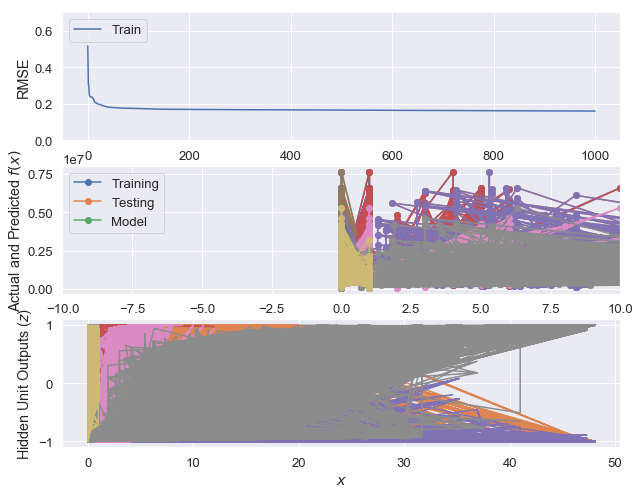

In [36]:
Y, Z = nn.use(X, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X,T,'o-',X,T,'o-',X,Y,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

In [38]:
print('MAE:',metrics.mean_absolute_error(T,Y))
print('MSE:',metrics.mean_squared_error(T,Y))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,Y)))
print('R^2 =',metrics.explained_variance_score(T,Y))

MAE: 196231.2795285791
MSE: 102471271343.59912
RMSE: 320111.3421039609
R^2 = 0.6798456213632128


## Cross Validation
To perform the cross validation we are using KFolds method. We are using the kfold function by sklearn library to generate the folds.Following steps are done to perform K fold validation: 

1. Create 5 kinds of folds in the data using the sklearn kfold function. Also shuffling the records to create maximum randomness.
2. Define differnt configurations of neural network to train on. The confirgurations are defined in terms of the number of layers in the network and the number of nodes in each layer.
3. Train the network for each fold and generate plots and compare different error rate values like RMSE and Rsquare.
4. Compare these models to find the best fit for the data. 

We creating upto 5 layers in the network with different nodes in each layer to perform the validation.

In [78]:
complete_dataset_cleaned=complete_dataset.dropna(subset=['Price']) 
complete_dataset_cleaned_trial=complete_dataset_cleaned[complete_dataset_cleaned['Method']=='S']

In [79]:
from sklearn import metrics



#Encoding Regions
region_values=complete_dataset_cleaned_trial['Regionname'].values

from sklearn import preprocessing


label_encoder=preprocessing.LabelEncoder()

rgn_int_encode=label_encoder.fit_transform(region_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

rgn_int_encode = rgn_int_encode.reshape(len(rgn_int_encode), 1)

rgn_onehot_encoded=hot_encoder.fit_transform(rgn_int_encode)

#Encoding Type
type_values=complete_dataset_cleaned_trial['Type'].values

label_encoder=preprocessing.LabelEncoder()

type_int_encode=label_encoder.fit_transform(type_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

type_int_encode = type_int_encode.reshape(len(type_int_encode), 1)

type_onehot_encoded=hot_encoder.fit_transform(type_int_encode)


# Distance and Room
rooms_vector=complete_dataset_cleaned_trial['Rooms'].values
distance_vector=complete_dataset_cleaned_trial['Distance'].values


C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

In [121]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]
input_data=np.column_stack(array_stacks)
Output_data=complete_dataset_cleaned_trial['Price'].values

inputTrainArray=[]
inputTestArray=[]
OutputTrainArray=[]
OutputTestArray=[]

#P=complete_dataset_cleaned_trial.as_matrix()

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(input_data)


for train_index, test_index in kf.split(input_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    inputTrainArray.append(input_data[train_index]) 
    inputTestArray.append(input_data[test_index])
    OutputTrainArray.append(Output_data[train_index])
    OutputTestArray.append(Output_data[test_index])
    

TRAIN: [    0     1     2 ... 28936 28937 28938] TEST: [    4    13    50 ... 28923 28933 28934]
TRAIN: [    0     1     2 ... 28936 28937 28938] TEST: [    7    11    14 ... 28910 28913 28925]
TRAIN: [    1     2     3 ... 28936 28937 28938] TEST: [    0    12    16 ... 28918 28919 28935]
TRAIN: [    0     1     3 ... 28935 28937 28938] TEST: [    2     8     9 ... 28929 28930 28936]
TRAIN: [    0     2     4 ... 28934 28935 28936] TEST: [    1     3     5 ... 28932 28937 28938]


<b> Generating the Folds in the data

## Fold 1

In [136]:
neuralNetConfigsArray=[]
neuralNetConfigsArray.append([13,39,21,1])
neuralNetConfigsArray.append([13,39,64,1])
neuralNetConfigsArray.append([13,26,1])
neuralNetConfigsArray.append([13,96,1])
neuralNetConfigsArray.append([13,39,24,36,12,1])

MAEArray_train=[]
MAEArray_test=[]
MSEArray_train=[]
MSEArray_test=[]
RMASEArray_train=[]
RMSEArray_test=[]
R2Array_train=[]
R2Array_test=[]

In [123]:
nn1 = NeuralNet(neuralNetConfigsArray[0])
nn1.train(inputTrainArray[0], OutputTrainArray[0].reshape((-1, 1)),ftracep=True)

Y_1_train, Z_1_train = nn1.use(inputTrainArray[0], retZ=True)



C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 190955.20471020124
MSE: 96439080911.24695
RMSE: 310546.42311777954
R^2 = 0.6993811359037139


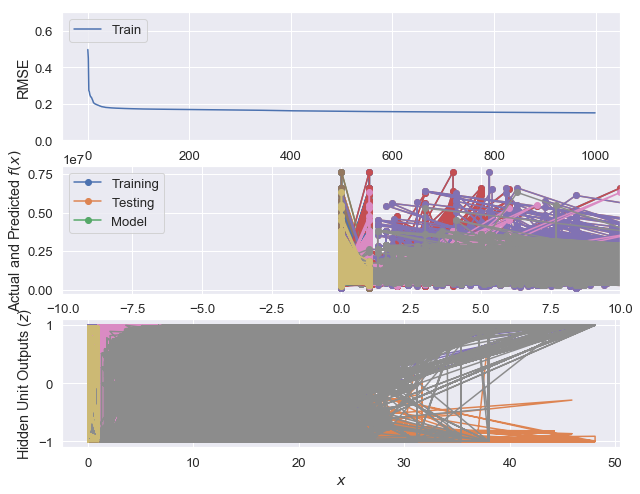

In [124]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn1.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[0],OutputTrainArray[0],'o-',inputTrainArray[0],OutputTrainArray[0],'o-',inputTrainArray[0],Y_1_train,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[0], Z_1_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[0],Y_1_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[0],Y_1_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[0],Y_1_train))

In [137]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[0],Y_1_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[0],Y_1_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[0],Y_1_train))

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 197376.0033290991
MSE: 112545465469.47467
RMSE: 335477.9656989035
R^2 = 0.6531136388513622


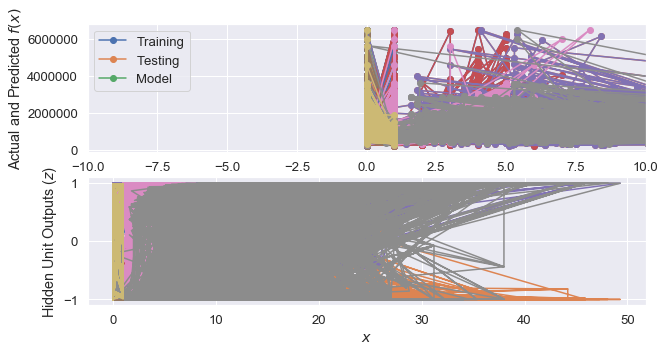

In [125]:
Y_1_test, Z_1_test = nn1.use(inputTestArray[0], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[0],OutputTestArray[0],'o-',inputTestArray[0],OutputTestArray[0],'o-',inputTestArray[0],Y_1_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[0], Z_1_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[0],Y_1_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[0],Y_1_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[0],Y_1_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[0],Y_1_test))

In [138]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[0],Y_1_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[0],Y_1_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[0],Y_1_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[0],Y_1_test))

## Fold 2

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 191856.63482569103
MSE: 97809993113.21982
RMSE: 312745.89224036154
R^2 = 0.698075915029027


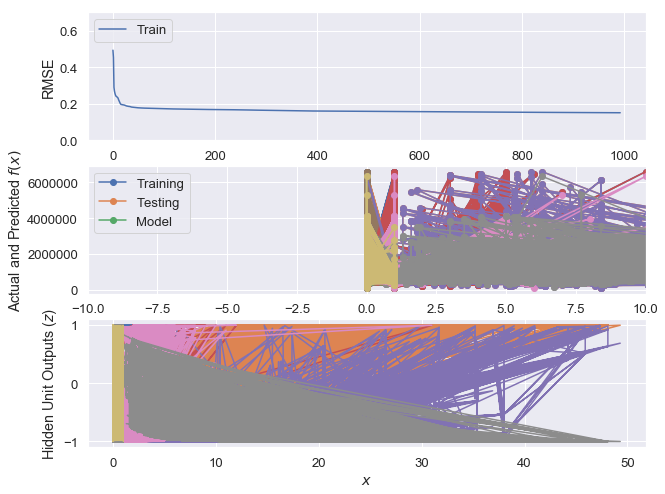

In [126]:
nn2 = NeuralNet(neuralNetConfigsArray[1])
nn2.train(inputTrainArray[1], OutputTrainArray[1].reshape((-1, 1)),ftracep=True)

Y_2_train, Z_2_train = nn2.use(inputTrainArray[1], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn2.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[1],OutputTrainArray[1],'o-',inputTrainArray[1],OutputTrainArray[1],'o-',inputTrainArray[1],Y_2_train,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[1], Z_2_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[1],Y_2_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[1],Y_2_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[1],Y_2_train))


In [139]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[1],Y_2_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[1],Y_2_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[1],Y_2_train))

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 194567.54430335196
MSE: 103849173057.86153
RMSE: 322256.37783892115
R^2 = 0.6668705062177425


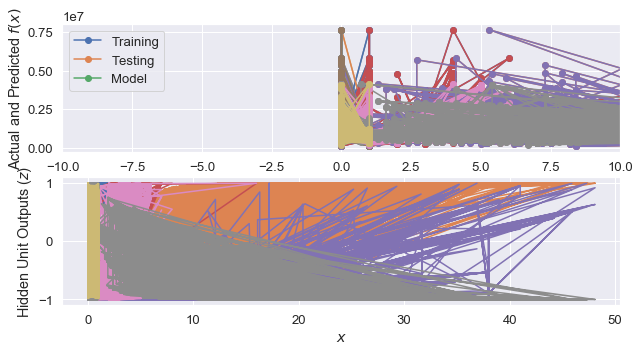

In [127]:
Y_2_test, Z_2_test = nn2.use(inputTestArray[1], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[1],OutputTestArray[1],'o-',inputTestArray[1],OutputTestArray[1],'o-',inputTestArray[1],Y_2_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[1], Z_2_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[1],Y_2_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[1],Y_2_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[1],Y_2_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[1],Y_2_test))



In [143]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[1],Y_2_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[1],Y_2_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[1],Y_2_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[1],Y_2_test))

## Fold 3

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 196803.4147762988
MSE: 103748827436.78944
RMSE: 322100.6479918807
R^2 = 0.6790307727394896


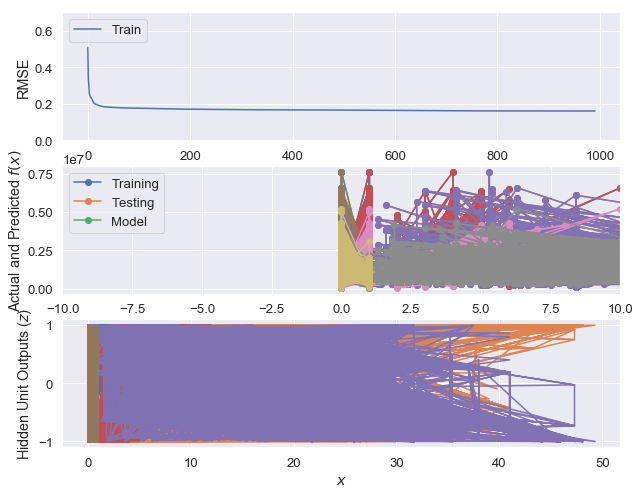

In [128]:
nn3 = NeuralNet(neuralNetConfigsArray[2])
nn3.train(inputTrainArray[2], OutputTrainArray[2].reshape((-1, 1)),ftracep=True)

Y_3_train, Z_3_train = nn3.use(inputTrainArray[2], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn3.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[2],OutputTrainArray[2],'o-',inputTrainArray[2],OutputTrainArray[2],'o-',inputTrainArray[2],Y_3_train,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[2], Z_3_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[2],Y_3_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[2],Y_3_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[2],Y_3_train))

In [140]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[2],Y_3_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[2],Y_3_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[2],Y_3_train))

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 200081.21935580563
MSE: 112080239725.63342
RMSE: 334783.87016944744
R^2 = 0.6437987120210239


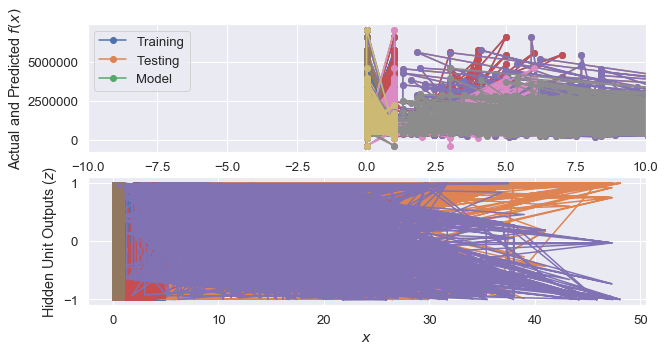

In [129]:
Y_3_test, Z_3_test = nn3.use(inputTestArray[2], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[2],OutputTestArray[2],'o-',inputTestArray[2],OutputTestArray[2],'o-',inputTestArray[2],Y_3_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[2], Z_3_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[2],Y_3_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[2],Y_3_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[2],Y_3_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[2],Y_3_test))



In [144]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[2],Y_3_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[2],Y_3_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[2],Y_3_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[2],Y_3_test))

## Fold 4

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 196575.79405640697
MSE: 101813080146.32822
RMSE: 319081.6198816977
R^2 = 0.6806273798285815


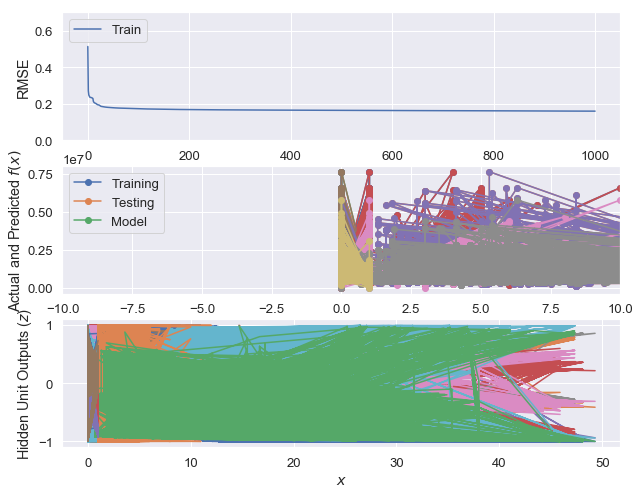

In [130]:
nn4 = NeuralNet(neuralNetConfigsArray[3])
nn4.train(inputTrainArray[3], OutputTrainArray[3].reshape((-1, 1)),ftracep=True)

Y_4_train, Z_4_train = nn4.use(inputTrainArray[3], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn4.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[3],OutputTrainArray[3],'o-',inputTrainArray[3],OutputTrainArray[3],'o-',inputTrainArray[3],Y_4_train,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[3], Z_4_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[3],Y_4_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[3],Y_4_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[3],Y_4_train))

In [141]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[3],Y_4_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[3],Y_4_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[3],Y_4_train))

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 202056.20974446562
MSE: 114686463371.39435
RMSE: 338653.89909374196
R^2 = 0.6552482049217274


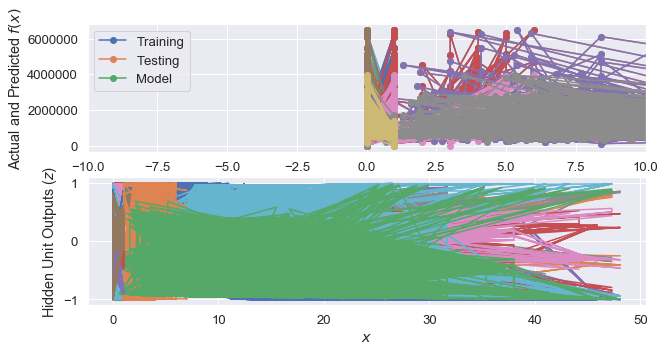

In [131]:
Y_4_test, Z_4_test = nn4.use(inputTestArray[3], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[3],OutputTestArray[3],'o-',inputTestArray[3],OutputTestArray[3],'o-',inputTestArray[3],Y_4_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[3], Z_4_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[3],Y_4_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[3],Y_4_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[3],Y_4_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[3],Y_4_test))



In [145]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[3],Y_4_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[3],Y_4_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[3],Y_4_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[3],Y_4_test))

## Fold5

[13, 39, 24, 36, 12, 1]


C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 195097.94246054348
MSE: 101856608714.7018
RMSE: 319149.82173691056
R^2 = 0.682493031973961


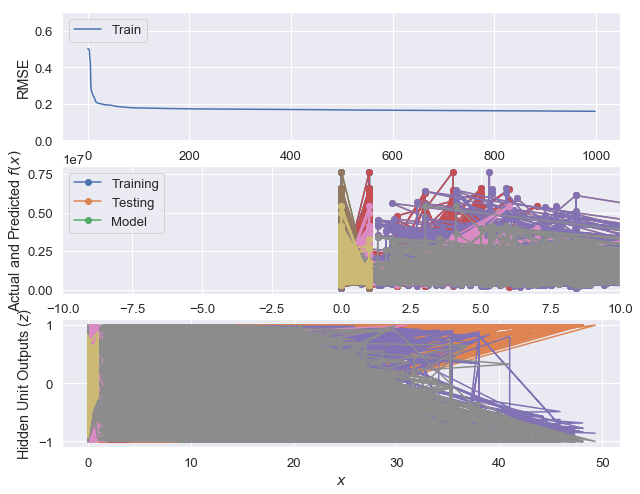

In [132]:
print(neuralNetConfigsArray[4])
nn5 = NeuralNet(neuralNetConfigsArray[4])
nn5.train(inputTrainArray[4], OutputTrainArray[4].reshape((-1, 1)),ftracep=True)

Y_5_train, Z_5_train = nn5.use(inputTrainArray[4], retZ=True)


plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn5.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(inputTrainArray[4],OutputTrainArray[4],'o-',inputTrainArray[4],OutputTrainArray[4],'o-',inputTrainArray[4],Y_5_train,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(inputTrainArray[4], Z_5_train[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTrainArray[4],Y_5_train))
print('MSE:',metrics.mean_squared_error(OutputTrainArray[4],Y_5_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train)))
print('R^2 =',metrics.explained_variance_score(OutputTrainArray[4],Y_5_train))





In [142]:
MAEArray_train.append(metrics.mean_absolute_error(OutputTrainArray[4],Y_5_train))
MSEArray_train.append(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train))
RMASEArray_train.append(np.sqrt(metrics.mean_squared_error(OutputTrainArray[4],Y_5_train)))
R2Array_train.append(metrics.explained_variance_score(OutputTrainArray[4],Y_5_train))

C:\Users\prash\Anaconda_Setup\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


MAE: 200329.04950143976
MSE: 109541615997.3334
RMSE: 330970.7177339612
R^2 = 0.6622002536415955


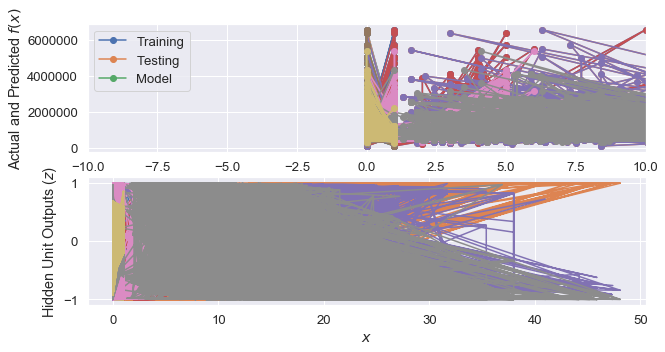

In [133]:
Y_5_test, Z_5_test = nn5.use(inputTestArray[4], retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(inputTestArray[4],OutputTestArray[4],'o-',inputTestArray[4],OutputTestArray[4],'o-',inputTestArray[4],Y_5_test,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,2)
plt.plot(inputTestArray[4], Z_5_test[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');


print('MAE:',metrics.mean_absolute_error(OutputTestArray[4],Y_5_test))
print('MSE:',metrics.mean_squared_error(OutputTestArray[4],Y_5_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(OutputTestArray[4],Y_5_test)))
print('R^2 =',metrics.explained_variance_score(OutputTestArray[4],Y_5_test))



In [146]:
MAEArray_test.append(metrics.mean_absolute_error(OutputTestArray[4],Y_5_test))
MSEArray_test.append(metrics.mean_squared_error(OutputTestArray[4],Y_5_test))
RMSEArray_test.append(np.sqrt(metrics.mean_squared_error(OutputTestArray[4],Y_5_test)))
R2Array_test.append(metrics.explained_variance_score(OutputTestArray[4],Y_5_test))

# IV - Results

- Presents the results of comparison of the tested models.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

### Train Result Comparisions

<table style="width:100%">
  <tr>
    <th>Fold</th>
    <th>MEA</th>
    <th>MSE</th> 
    <th>RMSE</th>
    <th>R2</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>190955.20471020124</td> 
    <td>96439080911.24695</td>
    <td>310546.42311777954</td>
    <td>0.6993811359037139</td>  
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>191856.63482569103</td> 
    <td>97809993113.21982</td>
    <td>312745.89224036154</td>
    <td>0.698075915029027</td>  
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>196803.4147762988</td> 
    <td>103748827436.78944</td>
    <td>322100.6479918807</td>
    <td>0.6790307727394896</td>  
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>196575.79405640697</td> 
    <td>101813080146.32822</td>
    <td>319081.6198816977</td>
    <td>0.6806273798285815</td>  
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>195097.94246054348</td> 
    <td>101856608714.7018</td>
    <td>319149.82173691056</td>
    <td>0.682493031973961</td>  
  </tr>
</table>

### Test Result Comparisions

<table style="width:100%">
  <tr>
    <th>Fold</th>
    <th>MEA</th>
    <th>MSE</th> 
    <th>RMSE</th>
    <th>R2</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>197376.0033290991</td> 
    <td>112545465469.47467</td>
    <td>335477.9656989035</td>
    <td>0.6531136388513622</td>  
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>194567.54430335196</td> 
    <td>103849173057.86153</td>
    <td>322256.37783892115</td>
    <td>0.6668705062177425</td>  
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>200081.21935580563</td> 
    <td>112080239725.63342</td>
    <td>334783.87016944744</td>
    <td>0.6437987120210239</td>  
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>202056.20974446562</td> 
    <td>114686463371.39435</td>
    <td>338653.89909374196</td>
    <td>0.6552482049217274</td>  
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>200329.04950143976</td> 
    <td>109541615997.3334</td>
    <td>330970.7177339612</td>
    <td>0.6622002536415955</td>  
  </tr>
</table>

## Plots for Result Comparision


### Training Data Plots

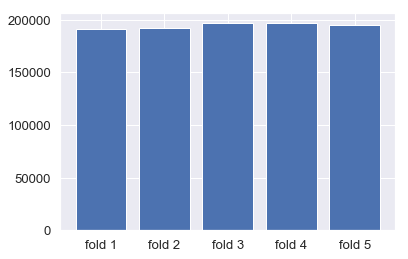

In [169]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MAEArray_train)
plt.xticks(y_pos, bars)
plt.show()


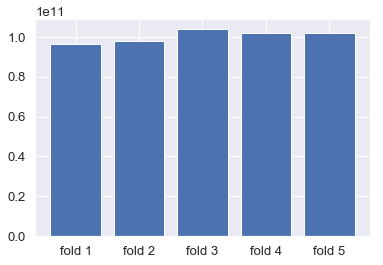

In [170]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MSEArray_train)
plt.xticks(y_pos, bars)
plt.show()


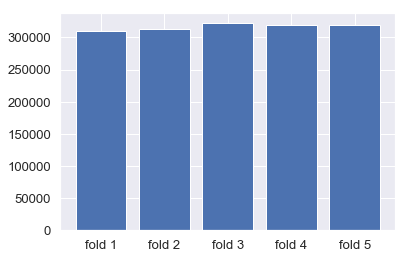

In [171]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, RMASEArray_train)
plt.xticks(y_pos, bars)
plt.show()


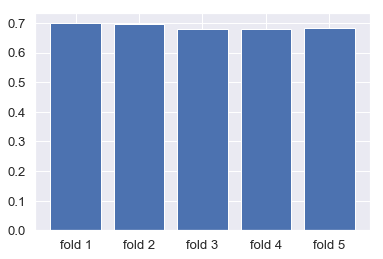

In [172]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, R2Array_train)
plt.xticks(y_pos, bars)
plt.show()


### Testing Data Plots

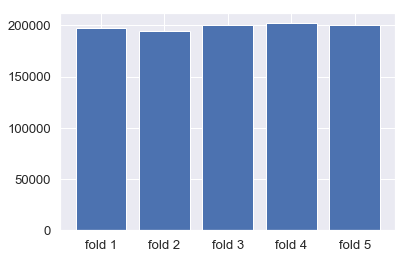

In [173]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MAEArray_test)
plt.xticks(y_pos, bars)
plt.show()


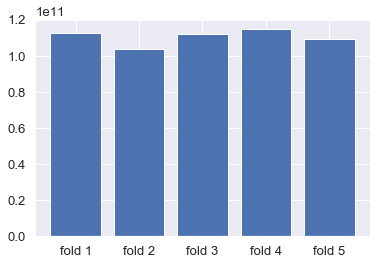

In [174]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, MSEArray_test)
plt.xticks(y_pos, bars)
plt.show()


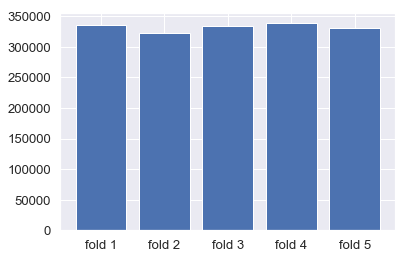

In [175]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, RMSEArray_test)
plt.xticks(y_pos, bars)
plt.show()


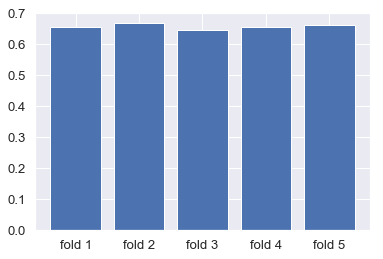

In [176]:
bars=["fold 1","fold 2","fold 3","fold 4","fold 5"]
y_pos=[1,2,3,4,5]
plt.bar(y_pos, R2Array_test)
plt.xticks(y_pos, bars)
plt.show()


### Choice of parameters and Results
In this assignment, we are using K-fold cross-validation to experiment. A neural network's complexity is defined by the number of layers it has and what function each layer performs. We have chosen the number of layers in the network and the number of nodes in each layer to experiment. we are using these 5 configurations: 

1. [13,39,21,1]
2. [13,39,64,1]
3. [13,26,1]
4. [13,96,1]
5. [13,39,24,36,12,1]

In the first two, we are experimenting with a total of 4 laters with a different number of nodes in the third layer. In the 3rd and 4th configuration, we are playing with 3 layer network with a different number of nodes, one having a moderate number 26 and the other one having high values like 96. In the fifth configuration, we are making a network with 5 layers to see if the fit improves.

We are considering four kinds of error parameters: 

1. MEA
2. MSE
3. RMSE
4. R Squared

Comparing all the configurations with respect to these error parameters, we can observe that the structure in the second fold i.e. [13,39,64,1] gives the best fit in both training and testing data. The model of fold 1 is quite near to the second one and outperforms in the training set but does not give a good result in the testing set. Also, we can observe that the almost all the models in training set give similar and good results but when we see the testing set they fail to fit as well which indicates overfitting a broader sense. 

Hence, we have successfully performed cross-validation with k fold cross-validation to find the best-suited parameters for our model.

# Conclusions

1. Neural networks are very versatile and can be used for a variety of problems.
2. Neural networks can have a problem of overfitting.
3. Neural networks have dying gradiant problems.
4. Neural networks work exceptionally well for complex problems like voice recognition. 
5. Neural Networks facilitate deep learning.
6. Various kinds of optimization techniques like Convex Optimization , Netwton's method are available.
7. Tanh and sigmoid are not good activation functions. SELU, Leaky RELU are some of the better ones.
8. RELU helps solve the dying gradient problem as well. 
9. The computation factor is very important while generating the neural netowrks as it grows exponentially with number of nodes and layes.
10. It is better to have a network with multiple layers than one with few layers and more nodes in a layer.

# Deep Learning 

## Choice of Networks

I have chosen as to deepen the networks as i conduct more experiments. The reason behind this is the imoproved accuracy in prediction on train data as the layers were added. Following are the three layers: 

1. 4 hidden layers--> [64,24,64,24]
2. 5 hidden layers--> [64,24,64,24,64]
3. 6 hidden layers--> [64,24,64,24,64,24]

## Explanation of Tensor Flow Codes and Application to data

I am using the Keras library in tensor flow to build my networks. To build a model in Keras, we following the below steps:

1. Invokes keras. Sequential method and pass an array of layers. Each layer can be defined with the number of nodes and the kind of activation function chosen. We can use different kinds of activation function, I have chosen to experiment with Relu and Selu.
2. Define a training optimizer for the model. Ex: tf.train.RMSPropOptimizer with the learning rate. 
3. compile the above model by passing the loss function(in my case "mse"), the above-built optimizer and the metric to be returned(in my case "mae").


After building the model we can call the model. fit method to train the model and apply it our data. While training we pass the input data, the expected output data, the number of epochs, the validation split size.

Hence, we create the network and run it. 

In [204]:
# Pre-Processing for Regression
from sklearn import metrics

# Kept only the rows in which an house was sold.

test_dataset_cleaned=test_dataset.dropna(subset=['Price']) 



trial_test=test_dataset_cleaned[test_dataset_cleaned['Method']=='S']

#Encoding Regions
region_values=trial_test['Regionname'].values

from sklearn import preprocessing


label_encoder=preprocessing.LabelEncoder()

rgn_int_encode=label_encoder.fit_transform(region_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

rgn_int_encode = rgn_int_encode.reshape(len(rgn_int_encode), 1)

rgn_onehot_encoded=hot_encoder.fit_transform(rgn_int_encode)

#Encoding Type
type_values=trial_test['Type'].values

label_encoder=preprocessing.LabelEncoder()

type_int_encode=label_encoder.fit_transform(type_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

type_int_encode = type_int_encode.reshape(len(type_int_encode), 1)

type_onehot_encoded=hot_encoder.fit_transform(type_int_encode)


# Distance and Room
rooms_vector=trial_test['Rooms'].values
distance_vector=trial_test['Distance'].values


array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]
X_test=np.column_stack(array_stacks)
T_test=trial_test['Price'].values

C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In c

In [208]:
dl_mae_train=[]
dl_mae_test=[]

### Network 1

In [178]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X.shape[1],)),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 5,641
Trainable params: 5,641
Non-trainable params: 0
_________________________________________________________________


In [186]:
    class PrintDot(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

    EPOCHS = 400

    # Store training stats
    history = model.fit(X, T, epochs=EPOCHS,
                        validation_split=0.2, verbose=0,
                        callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

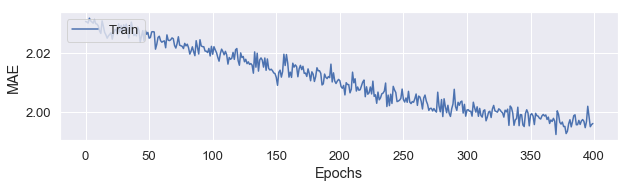

In [187]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(np.array(history.history['mean_absolute_error'])/100000)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(('Train','Test'),loc='upper left')

In [188]:
[loss, mae] = model.evaluate(X, T, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae))

Testing set Mean Abs Error: $198241.86


### Results on Test Data-->

In [205]:
[loss_test, mae_test] = model.evaluate(X_test, T_test, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae_test))

Testing set Mean Abs Error: $203282.20


In [209]:
dl_mae_train.append(mae)
dl_mae_test.append(mae_test)

### Network 2

In [189]:
def build_model2():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X.shape[1],)),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model2 = build_model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_12 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [190]:
    class PrintDot(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

    EPOCHS = 400

    # Store training stats
    history2 = model2.fit(X, T, epochs=EPOCHS,
                        validation_split=0.2, verbose=0,
                        callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

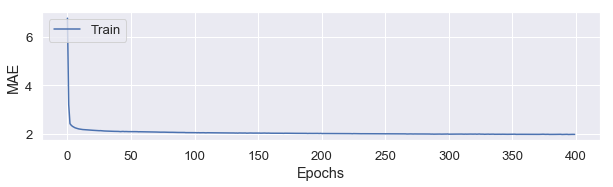

In [192]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(np.array(history2.history['mean_absolute_error'])/100000)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(('Train','Test'),loc='upper left')

In [193]:
[loss2, mae2] = model2.evaluate(X, T, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae2))

Testing set Mean Abs Error: $195424.80


### Results on Test Data-->

In [206]:
[loss_test2, mae_test2] = model2.evaluate(X_test, T_test, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae_test2))

Testing set Mean Abs Error: $201369.38


In [210]:
dl_mae_train.append(mae2)
dl_mae_test.append(mae_test2)

### Network 3 

In [199]:
def build_model3():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X.shape[1],)),
    keras.layers.Dense(24, activation=tf.nn.selu),
    keras.layers.Dense(64, activation=tf.nn.selu),
    keras.layers.Dense(24, activation=tf.nn.selu),
    keras.layers.Dense(64, activation=tf.nn.selu),
    keras.layers.Dense(24, activation=tf.nn.selu),     
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model3 = build_model3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_24 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_26 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_28 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 25        
Total para

In [200]:
    class PrintDot(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

    EPOCHS = 400

    # Store training stats
    history3 = model3.fit(X, T, epochs=EPOCHS,
                        validation_split=0.2, verbose=0,
                        callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

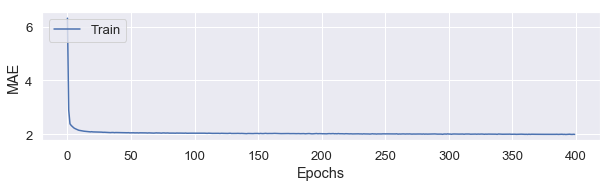

In [201]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(np.array(history3.history['mean_absolute_error'])/100000)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(('Train','Test'),loc='upper left')

In [202]:
[loss3, mae3] = model3.evaluate(X, T, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae3))

Testing set Mean Abs Error: $194985.45


### Results on Test Data-->

In [207]:
[loss_test3, mae_test3] = model3.evaluate(X_test, T_test, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae_test3))

Testing set Mean Abs Error: $201067.49


In [211]:
dl_mae_train.append(mae3)
dl_mae_test.append(mae_test3)

## Result

In [213]:
print("MAE on Training for Network 1",dl_mae_train[0])
print("MAE on Training for Network 2",dl_mae_train[1])
print("MAE on Training for Network 3",dl_mae_train[2])

MAE on Training for Network 1 198241.86021661176
MAE on Training for Network 2 195424.80277102202
MAE on Training for Network 3 194985.44635825173


In [214]:
print("MAE on Testing for Network 1",dl_mae_test[0])
print("MAE on Testing for Network 2",dl_mae_test[1])
print("MAE on Testing for Network 3",dl_mae_test[2])

MAE on Testing for Network 1 203282.20342886387
MAE on Testing for Network 2 201369.38313768766
MAE on Testing for Network 3 201067.49125725008


### MAE Plot of training data -->

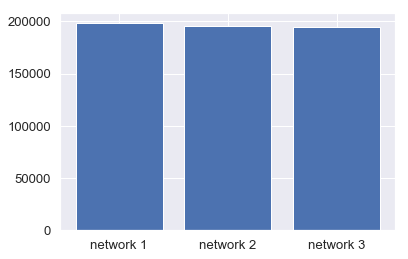

In [215]:
bars=["network 1","network 2","network 3"]
y_pos=[1,2,3]
plt.bar(y_pos, dl_mae_train)
plt.xticks(y_pos, bars)
plt.show()


### MAE Plot for Test Data-->

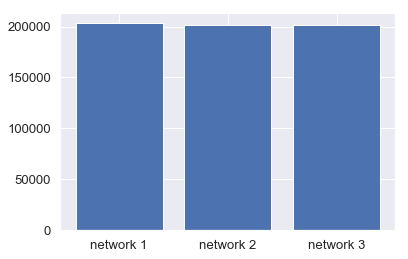

In [216]:
bars=["network 1","network 2","network 3"]
y_pos=[1,2,3]
plt.bar(y_pos, dl_mae_test)
plt.xticks(y_pos, bars)
plt.show()


## Observations

As we can see with the above results, the accuracy increases as the networks get deeper but it stops after a certain limit. As we can see there is not much improvement in going from network 2 and network 3. Also, I tried with increasing the number of nodes in these layers but that also did not produce any significant difference in the accuracy.